In [21]:
import keys
import datetime
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from binance.client import Client
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
%matplotlib inline

In [9]:
BTC = pd.read_csv('raw.csv')
BTC = BTC.fillna(0)

In [10]:
BTC['Timestamp'] = pd.to_datetime(BTC['Timestamp'], unit='s')

In [11]:
BTC.set_index('Timestamp', inplace = True)

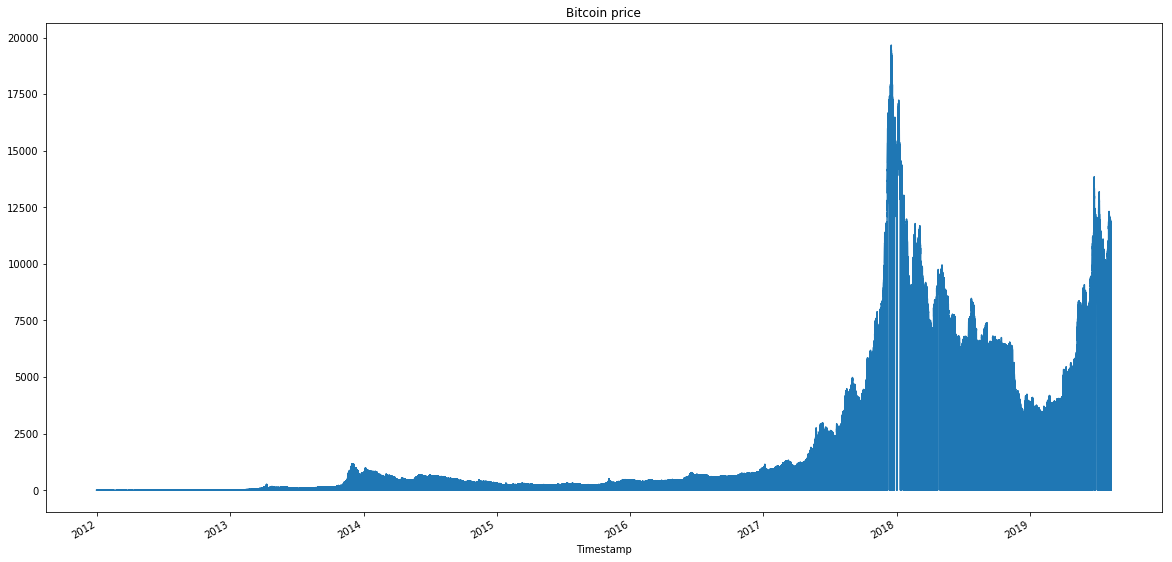

In [12]:
BTC['Close'] = BTC['Close'].astype(float)
BTC['Close'].plot(figsize=(20,10),title = 'Bitcoin price')

In [13]:
data = BTC.iloc[:,3:4].astype(float).values

In [14]:
scaler = MinMaxScaler()

In [15]:
data = scaler.fit_transform(data)

In [16]:
training_set = data[:10000]
test_set = data[10000:]

In [17]:
X_train = training_set[0:len(training_set)-1]
Y_train = training_set[1:len(training_set)]

In [18]:
X_test = test_set[0:len(test_set)-1]
Y_test = X_test = test_set[1:len(test_set)]

In [19]:
X_train = np.reshape(X_train,(len(X_train),1,X_train.shape[1]))
X_test = np.reshape(X_test,(len(X_test),1,X_test.shape[1]))

In [22]:
model = Sequential()
model.add(LSTM(256, return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(LSTM(256))
model.add(Dense(1))

In [23]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train,Y_train,epochs=50,batch_size=16,shuffle=False)

Epoch 1/50
9999/9999 [==============================] - 17s 2ms/step - loss: 5.8714e-08
Epoch 2/50
9999/9999 [==============================] - 15s 2ms/step - loss: 1.5041e-08
Epoch 3/50
9999/9999 [==============================] - 15s 1ms/step - loss: 1.6977e-08
Epoch 4/50
9999/9999 [==============================] - 15s 2ms/step - loss: 1.3610e-08
Epoch 5/50
9999/9999 [==============================] - 15s 2ms/step - loss: 1.1462e-08
Epoch 6/50
9999/9999 [==============================] - 16s 2ms/step - loss: 1.0022e-08: 
Epoch 7/50
9999/9999 [==============================] - 17s 2ms/step - loss: 9.1382e-09
Epoch 8/50
9999/9999 [==============================] - 16s 2ms/step - loss: 8.5410e-09
Epoch 9/50
9999/9999 [==============================] - 16s 2ms/step - loss: 7.5901e-09
Epoch 10/50
9999/9999 [==============================] - 16s 2ms/step - loss: 7.4790e-09: 
Epoch 11/50
9999/9999 [==============================] - 16s 2ms/step - loss: 6.8341e-09
Epoch 12/50
9999/9999 [===

In [24]:
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
real_price = scaler.inverse_transform(Y_test)

In [25]:
import matplotlib.pyplot as plt

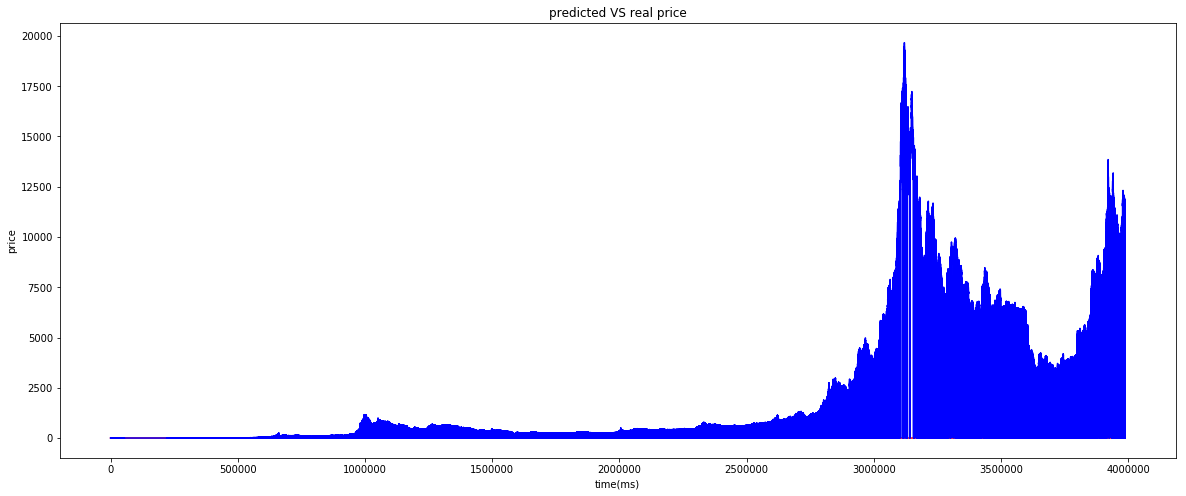

In [27]:
plt.figure(figsize=(20,8))
plt.plot(predicted_price,color='red',label='Predicted price of bitcoin')
plt.plot(real_price,color='blue',label='Real price of bitcoin')
plt.title('predicted VS real price')
plt.xlabel('time(ms)')
plt.ylabel('price')
plt.show()